In [29]:
#import essential libraries for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
#read data frame csv file as a data frame
df = pd.read_csv("training_data.csv")

In [31]:
#show the head of the data frame
df.head()

,Vds,Vgs,Id
0,0.00,0.0,0.000000e+00
1,0.02,0.0,2.770000e-14
2,0.04,0.0,4.790000e-14
3,0.06,0.0,6.900000e-14
4,0.08,0.0,8.950000e-14


In [32]:
#show information about the data frame including data type, column names, number of columns,...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25351 entries, 0 to 25350
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vds     25351 non-null  float64
 1   Vgs     25351 non-null  float64
 2   Id      25351 non-null  float64
dtypes: float64(3)
memory usage: 594.3 KB


In [33]:
#list the column names of a data frame:
df.columns

Index(['Vds', 'Vgs', 'Id'], dtype='object')

In [34]:
#make a correlated data frame:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
df_corr = df.corr()

In [35]:
#show the head of the data frame (here correlated data frame):
df_corr.head()

,Vds,Vgs,Id
Vds,1.000000e+00,2.205808e-18,0.109298
Vgs,2.205808e-18,1.000000e+00,0.855220
Id,1.092977e-01,8.552196e-01,1.000000


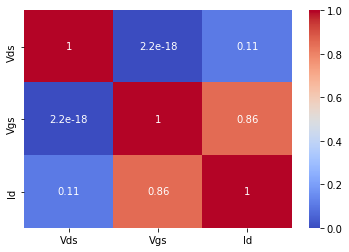

In [9]:
#define the size of the plot:
#plt.figure(figsize=(250,180))
#plot heatmap plot of the correlated data frame:
sns.heatmap(df_corr,annot=True,cmap='coolwarm')

In [36]:
#list the total number of null values in each column:
df.isnull().sum()

Vds    0
Vgs    0
Id     0
dtype: int64

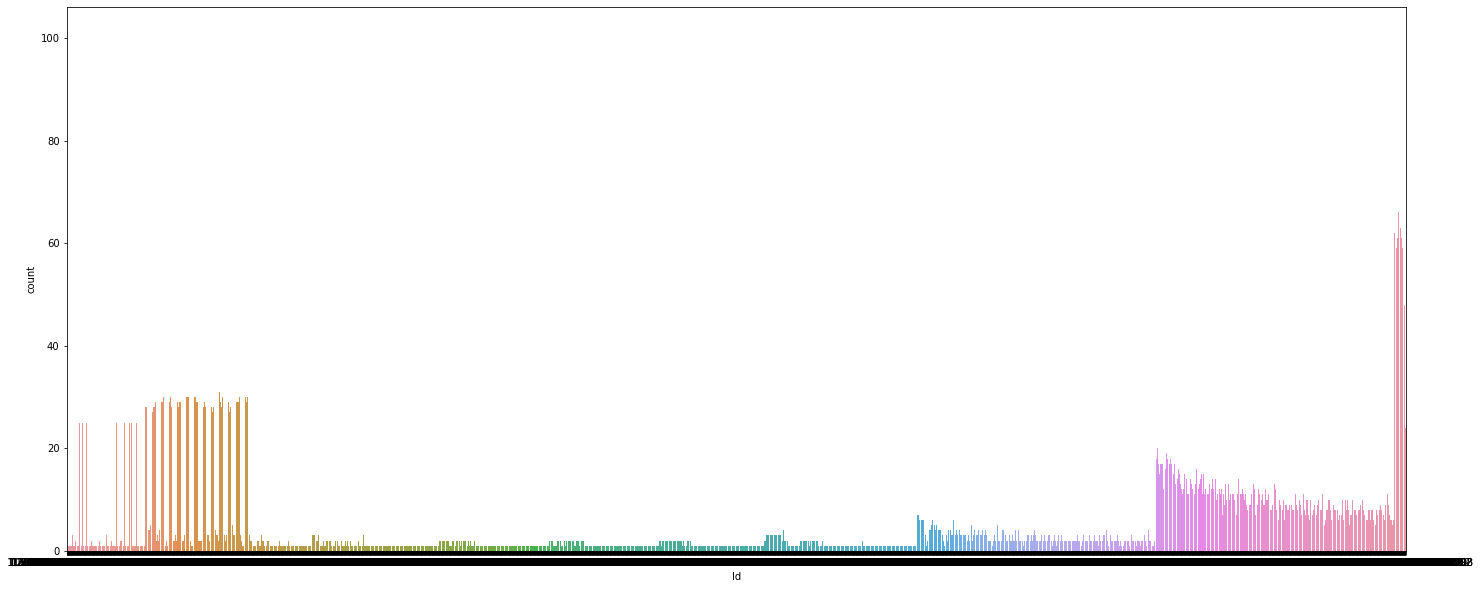

In [13]:
#define the size of the plot:
plt.figure(figsize=(24,10))
#plot the count plot of the data frame:
sns.countplot(x='Id',data=df,)

In [37]:
#define object and featues in the data frame:
X_train = df.drop('Id',axis=1).values
y_train = df['Id'].values

In [38]:
#import the model linear regression from scikit-learn linrary to perform 
#data training and prediction:
from sklearn.linear_model import LinearRegression

In [39]:
#define the model (estimator)
lm = LinearRegression()

In [40]:
#fit model to the training set of data:
lm.fit(X_train,y_train)

LinearRegression()

In [41]:
#read data frame csv file as a data frame
df_test1 = pd.read_csv("val01.csv")

In [42]:
df_test1.head()

,vds,vgs,id
0,2.0,1.0,2.010000e-12
1,2.0,1.2,2.010000e-12
2,2.0,1.4,2.050000e-12
3,2.0,1.6,7.200000e-12
4,2.0,1.8,6.660000e-10


In [44]:
#define object and featues in the data frame:
X_test1 = df_test1.drop('id',axis=1).values
y_test1 = df_test1['id'].values

In [46]:
#use the model to predict the object value for the test set of data:
y_predicted1=lm.predict(X_test1)

In [47]:
#print the coefficient of the line fit to the data using linear regression:
print('intercept:',lm.intercept_)

intercept: -3.699721724100052e-05


In [48]:
coeff_df = pd.DataFrame(lm.coef_,columns=['Coefficient'])

In [49]:
coeff_df

,Coefficient
0,0.000003
1,0.000024


In [50]:
#import required metrics from scikit-learn to calculate the MAE, MSE, RMSE of the predictions:
from sklearn import metrics

In [64]:
#print the calculated MAE, MSE, RMSE (comparing the TRUE value and predicted ones):
print('MAE:', metrics.mean_absolute_error(y_test1, y_predicted1))
print('MSE:', metrics.mean_squared_error(y_test1, y_predicted1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_predicted1)))

MAE: 1.6611364346649958e-05
MSE: 4.242343133393685e-10
RMSE: 2.0596949126979183e-05


In [52]:
#make a new data frame with one new column (predicted object valued for all data set)
#comparing to the old data frame
df_prediction1 = pd.DataFrame(y_predicted1,columns=['predicted id'])

In [53]:
#show the head of the recently created data frame:
df_prediction1.head()

,predicted id
0,-0.000007
1,-0.000002
2,0.000002
3,0.000007
4,0.000012


In [56]:
#add one column of a data frame (df_prediction1 to another data frame (df_test1) and make a new data frame
#(df_test1_prediction) out of that:
df_test1_prediction = pd.concat([df_test1,df_prediction1['predicted id']],axis=1)

In [57]:
df_test1_prediction.head()

,vds,vgs,id,predicted id
0,2.0,1.0,2.010000e-12,-0.000007
1,2.0,1.2,2.010000e-12,-0.000002
2,2.0,1.4,2.050000e-12,0.000002
3,2.0,1.6,7.200000e-12,0.000007
4,2.0,1.8,6.660000e-10,0.000012


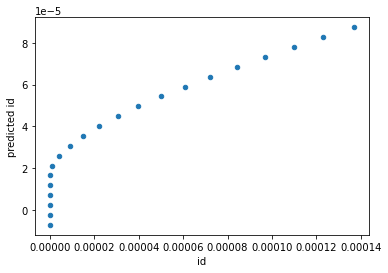

In [61]:
#plot the scatter plot of the predicted value (all data set) versus True values of the object
df_test1_prediction.plot(x='id', y='predicted id', kind='scatter')